In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

In [4]:
data = pd.read_csv('D:\Intership dataset\spam.csv', encoding = "latin-1")

In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.drop([data.columns[col] for col in range(2,5)], axis=1,inplace = True)

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


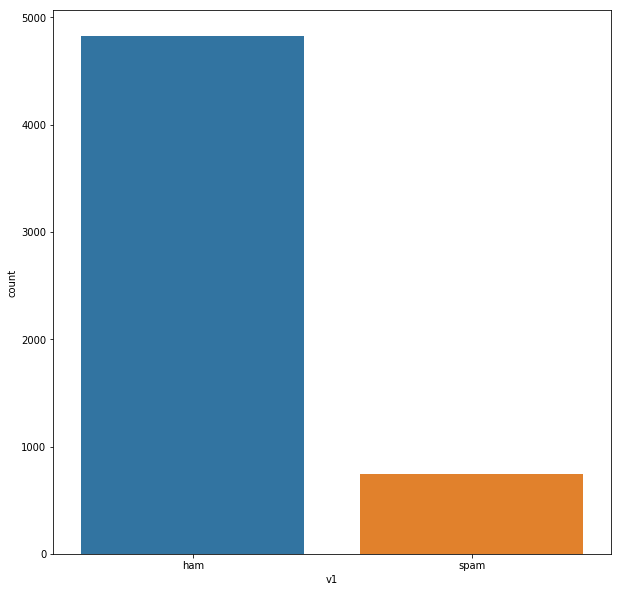

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,10))
sns.countplot( data = data , x= 'v1') 

In [11]:
encode = LabelEncoder()
data ['v1'] = encode.fit_transform(data["v1"])

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase = True)

In [13]:
y = data['v1']

In [14]:
data = data.drop('v1',axis=1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(data,y,train_size = 0.8)

C:\Users\prajw\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [62]:
X_tr_f = vectorizer.fit_transform(X_train['v2'])
X_te_f = vectorizer.transform(X_test['v2'])

In [63]:
print(X_tr_f)

  (0, 5609)	0.20546228694461965
  (0, 6153)	0.30170302157822904
  (0, 7140)	0.17280057358840878
  (0, 4590)	0.1785718630695143
  (0, 5433)	0.20375085679114924
  (0, 6248)	0.2856295839396729
  (0, 3632)	0.31777645921678516
  (0, 3076)	0.17599494321800926
  (0, 6388)	0.31777645921678516
  (0, 5854)	0.3291807447121742
  (0, 2171)	0.3291807447121742
  (0, 3140)	0.3452541823507303
  (0, 4280)	0.2435745243017954
  (0, 5424)	0.23179088686941487
  (1, 5702)	0.23768482854624992
  (1, 4076)	0.28112545773922
  (1, 5224)	0.31449406147458764
  (1, 7252)	0.2849162543584384
  (1, 4072)	0.26850342439306796
  (1, 3200)	0.2986589168199883
  (1, 7159)	0.22339805187678766
  (1, 6647)	0.26330196116914273
  (1, 2088)	0.37751947012574755
  (1, 5362)	0.2776265608210324
  (1, 5932)	0.3227829869330826
  :	:
  (4453, 371)	0.21790840469879152
  (4453, 5768)	0.21790840469879152
  (4453, 696)	0.21790840469879152
  (4454, 3953)	0.41431368195310286
  (4454, 3366)	0.29692426522639487
  (4454, 4086)	0.30944155064497425

In [64]:
print(X_te_f)

  (0, 7400)	0.2595252276325295
  (0, 6920)	0.308721667205346
  (0, 6164)	0.2518317994480513
  (0, 6123)	0.3787044029639995
  (0, 5613)	0.2856485083134955
  (0, 4147)	0.5450090284818812
  (0, 2361)	0.3485644792029028
  (0, 400)	0.3610736777891634
  (1, 7497)	0.34195504599939597
  (1, 6639)	0.24962633223224187
  (1, 6048)	0.3161631607102564
  (1, 5362)	0.26795641527263153
  (1, 5068)	0.27694272665773634
  (1, 3366)	0.19573900943670172
  (1, 3293)	0.25070983594106805
  (1, 3221)	0.3643699061478813
  (1, 2836)	0.38216158156606356
  (1, 2557)	0.35174651154662084
  (1, 2249)	0.261894423915025
  (2, 6970)	0.26970137706480546
  (2, 6756)	0.2930221094629687
  (2, 4661)	0.19059005023855544
  (2, 4609)	0.21909713678208545
  (2, 4492)	0.2930221094629687
  (2, 4465)	0.23004587743882907
  :	:
  (1113, 3911)	0.21589980894937666
  (1113, 1589)	0.37830596205149397
  (1113, 1575)	0.2966770979963775
  (1114, 7384)	0.146339860335108
  (1114, 7197)	0.28717519734960695
  (1114, 7105)	0.2342416960705437
  (1

In [65]:
log = LogisticRegression()
log.fit(X_tr_f,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
SV = SVC()
SV.fit(X_tr_f,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
NN = MLPClassifier(hidden_layer_sizes = (128,128))
NN.fit(X_tr_f,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128, 128), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [68]:
log_pre= log.predict(X_te_f)
SV_pre = SV.predict(X_te_f)
NN_pre = NN.predict(X_te_f)

In [69]:
print(f'Logistic Regression Accuracy :{ log.score(X_te_f,y_test)} ')
print(f'SVM Accuracy : {SV.score(X_te_f, y_test)} ')
print(f'Neural Network Accuracy : { NN.score(X_te_f,y_test)}')

Logistic Regression Accuracy :0.9632286995515695 
SVM Accuracy : 0.8690582959641255 
Neural Network Accuracy : 0.9874439461883409
